In [40]:
import numpy as np        
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv('data.csv')

In [7]:
data.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
568,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,...,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,NaN
183,873843,B,11.410,14.92,73.53,402.0,0.09059,0.08155,0.06181,0.023610,...,17.70,79.12,467.2,0.11210,0.16100,0.16480,0.06296,0.1811,0.07427,NaN
404,904969,B,12.340,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.020540,...,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974,NaN
458,9112594,B,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.017620,...,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291,NaN
348,898690,B,11.470,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.023220,...,20.79,79.67,475.8,0.15310,0.11200,0.09823,0.06548,0.2851,0.08763,NaN
61,858981,B,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.009259,...,27.04,62.06,273.9,0.16390,0.16980,0.09001,0.02778,0.2972,0.07712,NaN
313,893988,B,11.540,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,...,12.87,81.23,467.8,0.10920,0.16260,0.08324,0.04715,0.3390,0.07434,NaN
427,90745,B,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.014040,...,32.04,83.69,489.5,0.13030,0.16960,0.19270,0.07485,0.2965,0.07662,NaN
128,866458,B,15.100,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.085340,...,18.33,105.90,762.6,0.13860,0.28830,0.19600,0.14230,0.2590,0.07779,NaN
233,88206102,M,20.510,27.81,134.40,1319.0,0.09159,0.10740,0.15540,0.083400,...,37.38,162.70,1872.0,0.12230,0.27610,0.41460,0.15630,0.2437,0.08328,NaN


In [8]:
data.shape

(569, 33)

In [11]:
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


**Column ID and Unnamed are of no use hence we drop these columns.**

In [42]:
data=data.drop(['id','Unnamed: 32'],axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Diagosis is the column that we have to predict.Hence we separate the labels and the features.**

In [43]:
y = data['diagnosis']
data = data.drop('diagnosis',axis=1)
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

**Checking the missing value**

In [44]:
data.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

In [46]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**For visualisation purpose,we divide data into 3 groups categorized by _mean,_se and worst**

In [47]:
data_mean = data.ix[:,0:10]
print(data_mean.columns)
data_se = data.ix[:,10:20]
print(data_se.columns)
data_worst=data.ix[:,20:]
print(data_worst.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


C:\Users\Raghavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Raghavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Raghavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-in

C:\Users\Raghavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


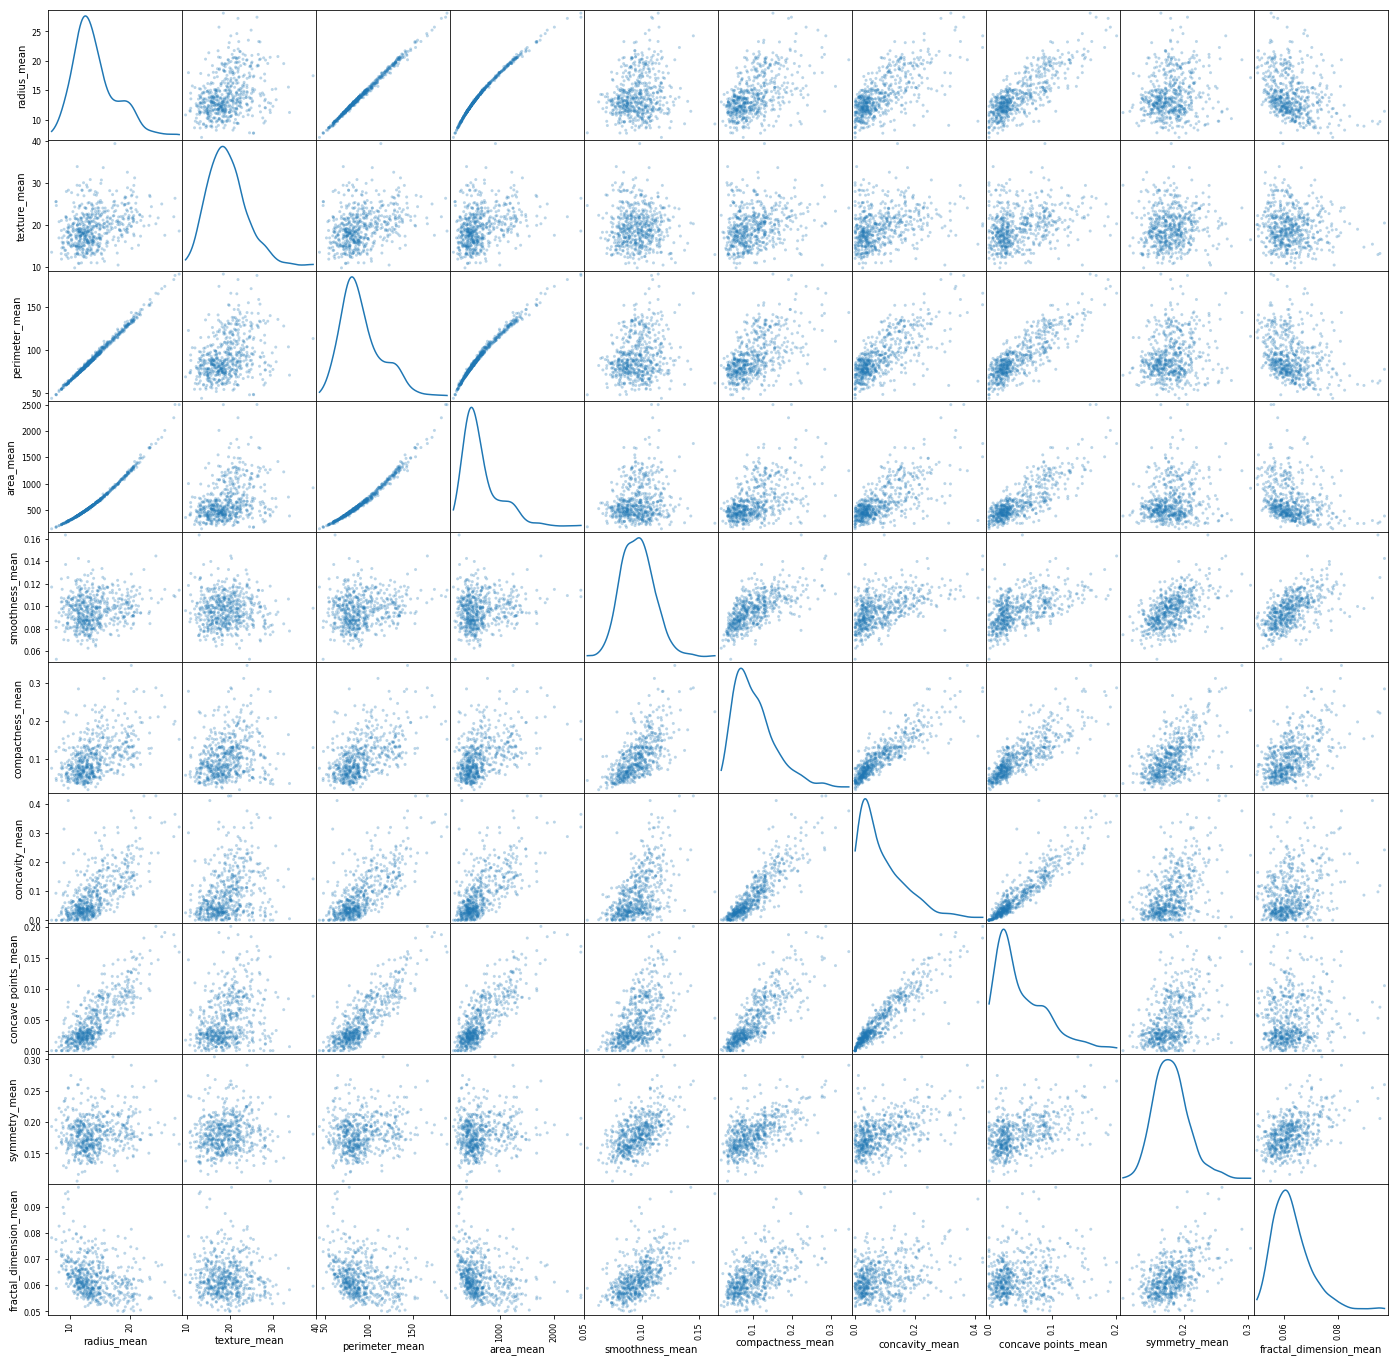

In [31]:
pd.scatter_matrix(data_mean ,alpha = 0.3, figsize = (24,24), diagonal = 'kde');

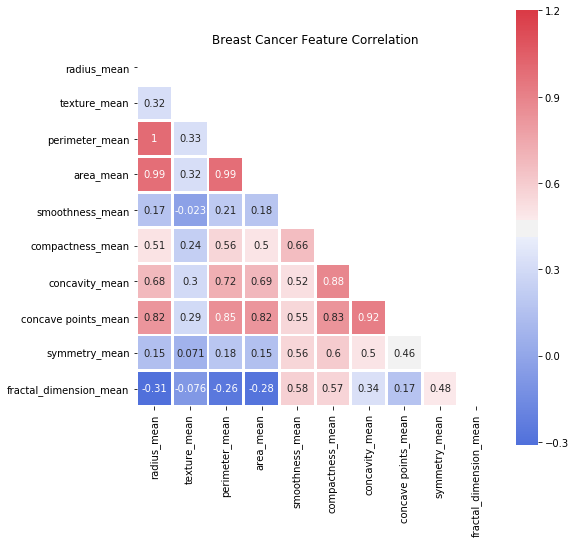

In [50]:
# Compute the correlation matrix for data_mean
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')


# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
ax=ax,annot=True, fmt='.2g',linewidths=2)

**Radius and Perimeter mean are strongly related to Area Mean.
Concavity mean and Compactness mean is strongly related to Concave_points_mean.
Therefore,we remove them from the dataset.
**

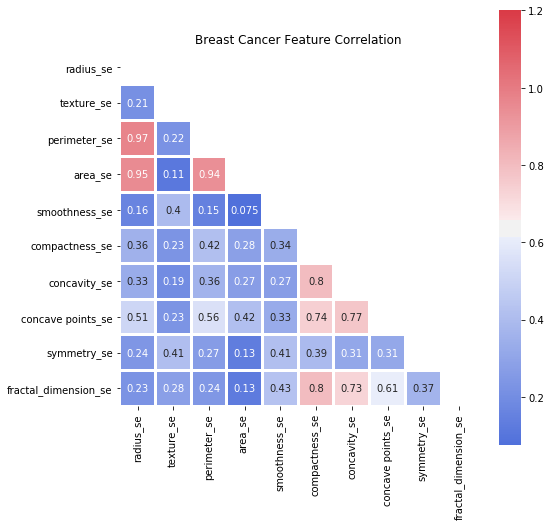

In [52]:
# Compute the correlation matrix for data_se
corr = data_se.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')


# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
ax=ax,annot=True, fmt='.2g',linewidths=2)

**perimeter_se and area_se are strongly related to radius_se.
concavity_se and fractal_dimension_se are strongly related to compactness_se.**

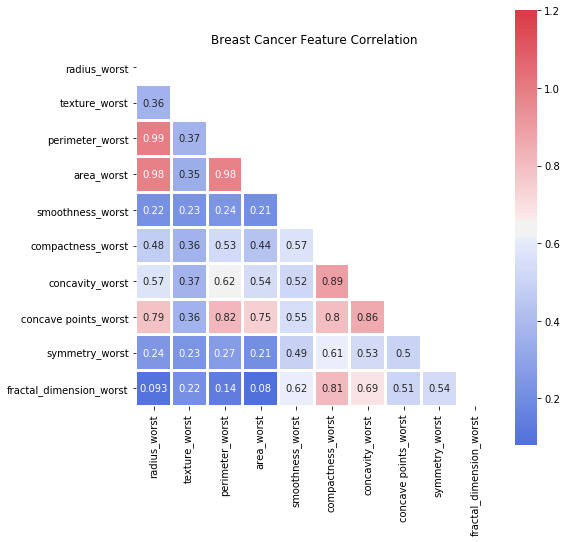

In [53]:
# Compute the correlation matrix for data_se
corr = data_worst.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')


# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
ax=ax,annot=True, fmt='.2g',linewidths=2)

**Perimeter_worst and area_worst are strongly related to radius_worst.
Concavity_worst and concave_point_worst are strongly related to compactness_worst.
**

**Removing the highly correlated features from the data.**

In [54]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concavity_mean','area_se','perimeter_se','concavity_se','fractal_dimension_se','area_worst','perimeter_worst','concavity_worst','concave points_worst']
x_1 = data.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,25.38,17.33,0.1622,0.6656,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,24.99,23.41,0.1238,0.1866,0.2750,0.08902
2,21.25,1203.0,0.10960,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,23.57,25.53,0.1444,0.4245,0.3613,0.08758
3,20.38,386.1,0.14250,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,14.91,26.50,0.2098,0.8663,0.6638,0.17300
4,14.34,1297.0,0.10030,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,22.54,16.67,0.1374,0.2050,0.2364,0.07678


Accuracy is:  0.9707602339181286


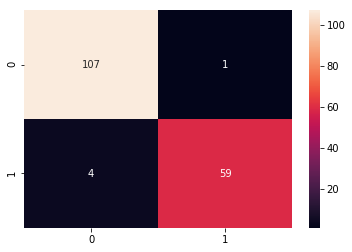

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")